<a href="https://colab.research.google.com/github/DanielProanoGuevara/SistemasCognitivosArtificiales/blob/master/Actividad_1_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


En el conjunto de training hay 60000 Muestras

En el conjunto de test hay 10000 Muestras

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

Un ejemplo del dataset se conforma por una imagen (o matrix de pixeles) como se muestra a continuación

In [5]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
print(x_test[0].shape)
print(x_test[0].size)

(28, 28)
784


Muestra como 0 el blanco y entre 0 y 1 la composición de la imagen
Cada ejemplo del dataset tiene dimensiones (28, 28) dando un total de 784 pixeles

En la variable 'y' se muestra la categoría a la que pertenece cada imágen con un total de 10 categorías

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [0]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

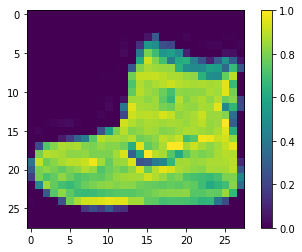

In [8]:
visualize_example(x_train[0])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

### Preprocesamiento de datos
Cambiamos la forma de las entradas de imágenes de 28x28 a un vector de 784 elementos

In [0]:
X_test = np.reshape(x_test,(10000,784))
X_train = np.reshape(x_train,(60000,784))

Dado que las variables en y representan categorías, es necesario codificarlas para que el modelo con las considere como más o menos relevantes por su numero

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder_y = OneHotEncoder()
y_train = onehotencoder_y.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehotencoder_y.transform(y_test.reshape(-1,1)).toarray()

### Crear el clasificador

#### Crear la arquitectura de la red

In [0]:
#Inicializar la red
classifier = Sequential()

#Capa inicial y primera capa oculta de 128 nodos
classifier.add(Dense(128, input_shape=(784,), activation = 'sigmoid', kernel_initializer = 'uniform'))

#Segunda capa oculta de 64 nodos
classifier.add(Dense(64, activation = 'sigmoid', kernel_initializer = 'uniform'))

#Capa de salida
classifier.add(Dense(10, activation = 'softmax', kernel_initializer = 'uniform'))

#### Compilar la red utilizando SGD y entrenar la red neuronal

In [12]:
#Compilar la red y utilizar SGD
classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy', 'categorical_crossentropy'])

#Entrenar la red neuronal
classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 2)

Epoch 1/20
 - 2s - loss: 2.3027 - accuracy: 0.1023 - categorical_crossentropy: 2.3027
Epoch 2/20
 - 2s - loss: 2.3005 - accuracy: 0.1130 - categorical_crossentropy: 2.3005
Epoch 3/20
 - 2s - loss: 2.2968 - accuracy: 0.1330 - categorical_crossentropy: 2.2968
Epoch 4/20
 - 2s - loss: 2.2884 - accuracy: 0.1794 - categorical_crossentropy: 2.2884
Epoch 5/20
 - 2s - loss: 2.2587 - accuracy: 0.2424 - categorical_crossentropy: 2.2587
Epoch 6/20
 - 2s - loss: 2.1239 - accuracy: 0.2693 - categorical_crossentropy: 2.1239
Epoch 7/20
 - 2s - loss: 1.8484 - accuracy: 0.3265 - categorical_crossentropy: 1.8484
Epoch 8/20
 - 2s - loss: 1.6837 - accuracy: 0.4049 - categorical_crossentropy: 1.6837
Epoch 9/20
 - 2s - loss: 1.5637 - accuracy: 0.4693 - categorical_crossentropy: 1.5637
Epoch 10/20
 - 2s - loss: 1.4268 - accuracy: 0.5298 - categorical_crossentropy: 1.4268
Epoch 11/20
 - 2s - loss: 1.3031 - accuracy: 0.5656 - categorical_crossentropy: 1.3031
Epoch 12/20
 - 2s - loss: 1.2060 - accuracy: 0.5842 

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [13]:
acc = classifier.evaluate(X_test, y_test, verbose = 1)[1]
print("El accuracy en el dataset de test es: ", acc)

y_pred = classifier.predict(X_test)
print("El array de predicción se ve de la forma")
print(y_pred[0])
print("Expresa la probabilidad de que pertenezca a una u otra categoría")

10000/10000 [==============================] - 0s 25us/step
El accuracy en el dataset de test es:  0.6557000279426575
El array de predicción se ve de la forma
[3.2449661e-06 8.7629800e-08 1.5883188e-04 1.4013362e-04 1.3900624e-04
 2.2996373e-01 3.3518480e-04 1.9291258e-01 2.6878387e-02 5.4946876e-01]
Expresa la probabilidad de que pertenezca a una u otra categoría


**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

El dato de prueba 0 es:  9  y el dato predicho es:  9
[[755   2   1 138  42   3  44   0  15   0]
 [ 24 909   1  47   9   3   6   0   1   0]
 [ 33   0  35  16 753   1 146   0  16   0]
 [248 112   0 563  19   5  48   0   5   0]
 [ 70   0  35  36 735   0 106   0  18   0]
 [  0   0   0   2   0 734   0 113  18 133]
 [252   1  24  57 449   1 175   0  41   0]
 [  0   0   0   0   0  67   0 847   0  86]
 [  1   0   6  10  28  37  15   3 895   5]
 [  0   0   0   0   0  18   0  60  13 909]]


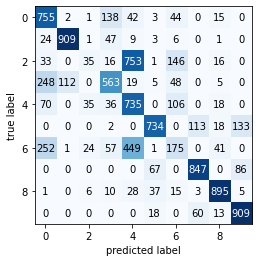

In [14]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#para obtener a qué categoría pertenece cada dato se utiliza la función argmax
print("El dato de prueba 0 es: ", np.argmax(y_test[0]), " y el dato predicho es: ", np.argmax(y_pred[0]))

#devolver al las categorías originales la variable 'y'
y_pred = onehotencoder_y.inverse_transform(y_pred)
y_test = onehotencoder_y.inverse_transform(y_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

Los números que obtenemos al hacerl el predict representan la probabilidad de que el ejemplo pertenezca a alguna categoría

El valor resultante de cada clase se puede obtener con *argmax* aplicado a cada uno de los elementos del array o aplicando el decodificador *one_hot* con la información de codificación de los datos